In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np

# Read in the CSV file
df = pd.read_csv('ReviewsWithVotes1.csv')


# fix votes nan to 0
df["votes"] = df["votes"].fillna(0)
# df["votes"] = df["votes"] - 1 # remove self votes

# # normalize votes
# df["votes"] = df["votes"] / df["votes"].max()


# high_quality_threshold = 0.45

# df["imputed_quality"] = (df["votes"] >= high_quality_threshold)*1
df["imputed_quality"] = (df["votes"] > 1) * 1 # sum of annotators votes > 1 ie (2 or 3)

# TODO:  Setting threshold to 0 (1,2,3 annotators) greatly improves performance => we should annotate more!


# convert boolean cols to int
df["again"] = df["again"].astype(int)
df["instructorEnjoyed"] = df["instructorEnjoyed"].astype(int)
df["instructorAgain"] = df["instructorAgain"].astype(int)



# Define a function to calculate TTR
def calculate_ttr(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens_val = []
    
    for token in tokens:
        if token not in stop_words:
            tokens_val.append(token)
    
    # Calculate TTR
    ttr = len(set(tokens_val)) / len(tokens_val)
    return ttr


# Define a function to calculate Herdan's C
def calculate_herdan(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens_val = []
    
    for token in tokens:
        if token not in stop_words:
            tokens_val.append(token)
    
    # Calculate Herdan's C
    herdan = np.log(len(set(tokens_val))) / np.log(len(tokens_val))
    return herdan


# Define a function to calculate RTTR
def calculate_rttr(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens_val = []
    
    for token in tokens:
        if token not in stop_words:
            tokens_val.append(token)
    
    # Calculate RTTR
    rttr = len(set(tokens_val)) / np.sqrt(len(tokens_val))
    return rttr


# Define a function to calculate CTTR
def calculate_cttr(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    
    stop_words = set(stopwords.words('english'))
    tokens_val = []
    
    for token in tokens:
        if token not in stop_words:
            tokens_val.append(token)
    
    # Calculate CTTR
    cttr = len(set(tokens_val)) / np.sqrt(2*len(tokens_val))
    return cttr


# Define a function to calculate Summer's
def calculate_summer(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens_val = []
    
    for token in tokens:
        if token not in stop_words:
            tokens_val.append(token)
    
    # Calculate Summer's method
    summer = np.log(np.log(len(set(tokens_val)))) / np.log(np.log(len(tokens_val)))
    return summer


# Define a function to calculate Maas
def calculate_maas(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens_val = []
    
    for token in tokens:
        if token not in stop_words:
            tokens_val.append(token)
    
    # Calculate Maas method
    maas = (np.log(len(tokens_val)) - np.log(len(set(tokens_val)))) / (np.log(len(tokens_val))**2)
                                                                       
    return maas


# Define a function to calculate Mean Word Frequency
def calculate_mwf(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens_val = []
    
    for token in tokens:
        if token not in stop_words:
            tokens_val.append(token)
    
    # Calculate Dugast method
    mwf = len(tokens_val) / len(set(tokens_val))
    return mwf


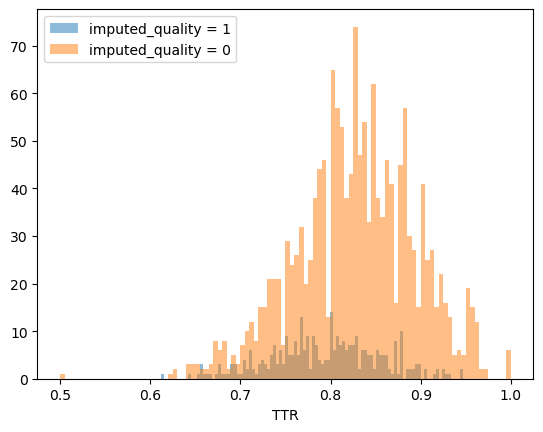

In [2]:
# Create a new column with TTR values
df['ttr'] = df['content'].apply(calculate_ttr)

# TTR by imputed_quality
plt.figure()
plt.hist(df[df['imputed_quality'] == 1]['ttr'], bins=100, alpha=0.5, label='imputed_quality = 1')
plt.hist(df[df['imputed_quality'] == 0]['ttr'], bins=100, alpha=0.5, label='imputed_quality = 0')
plt.legend(loc='upper left')

plt.xlabel('TTR')
plt.show()

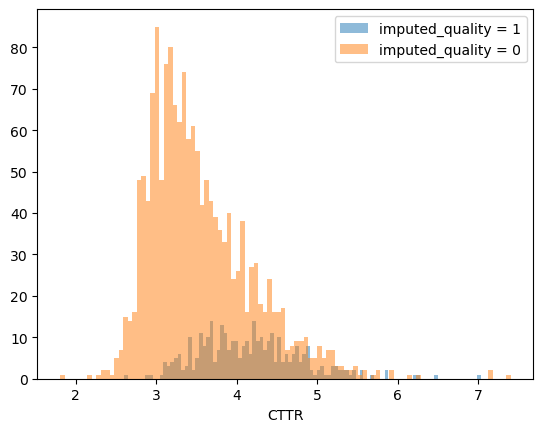

In [3]:
# Create a new column with CTTR values
df['cttr'] = df['content'].apply(calculate_cttr)

# CTTR by imputed_quality
plt.figure()
plt.hist(df[df['imputed_quality'] == 1]['cttr'], bins=100, alpha=0.5, label='imputed_quality = 1')
plt.hist(df[df['imputed_quality'] == 0]['cttr'], bins=100, alpha=0.5, label='imputed_quality = 0')
plt.legend(loc='upper right')

plt.xlabel('CTTR')
plt.show()

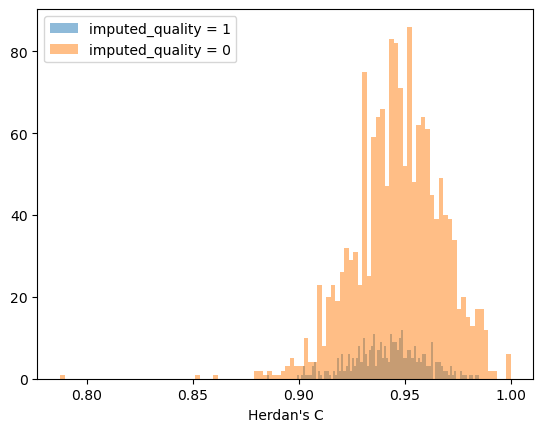

In [4]:
# Create a new column with Herdans values
df['herdan'] = df['content'].apply(calculate_herdan)

# Herdan's C by imputed_quality
plt.figure()
plt.hist(df[df['imputed_quality'] == 1]['herdan'], bins=100, alpha=0.5, label='imputed_quality = 1')
plt.hist(df[df['imputed_quality'] == 0]['herdan'], bins=100, alpha=0.5, label='imputed_quality = 0')
plt.legend(loc='upper left')

plt.xlabel('Herdan\'s C')
plt.show()

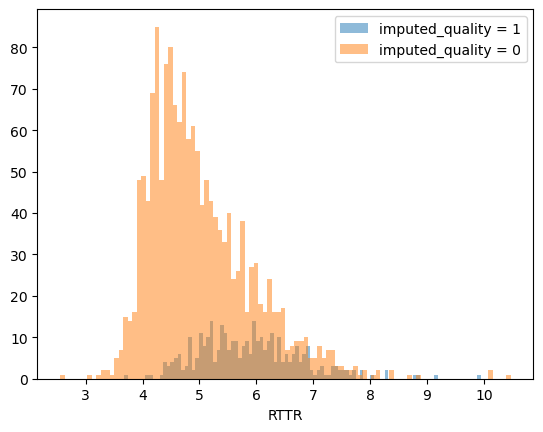

In [5]:
# Create a new column with RTTR values
df['rttr'] = df['content'].apply(calculate_rttr)

# RTTR by imputed_quality
plt.figure()
plt.hist(df[df['imputed_quality'] == 1]['rttr'], bins=100, alpha=0.5, label='imputed_quality = 1')
plt.hist(df[df['imputed_quality'] == 0]['rttr'], bins=100, alpha=0.5, label='imputed_quality = 0')
plt.legend(loc='upper right')

plt.xlabel('RTTR')
plt.show()

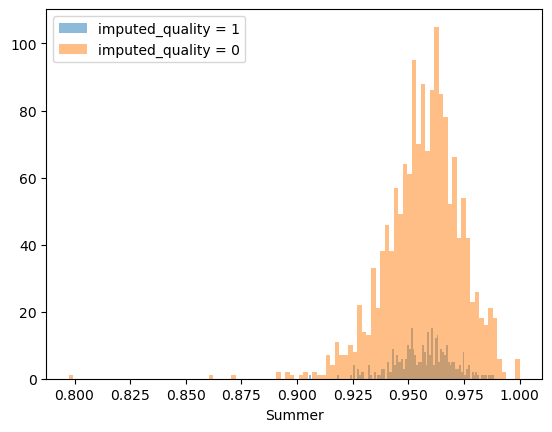

In [6]:
# Create a new column with Summer values
df['summer'] = df['content'].apply(calculate_summer)

# Summer by imputed_quality
plt.figure()
plt.hist(df[df['imputed_quality'] == 1]['summer'], bins=100, alpha=0.5, label='imputed_quality = 1')
plt.hist(df[df['imputed_quality'] == 0]['summer'], bins=100, alpha=0.5, label='imputed_quality = 0')
plt.legend(loc='upper left')

plt.xlabel('Summer')
plt.show()

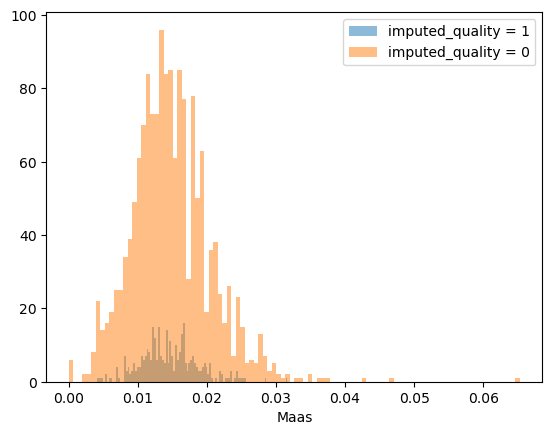

In [7]:
# Create a new column with Maas values
df['maas'] = df['content'].apply(calculate_maas)

# Maas by imputed_quality
plt.figure()
plt.hist(df[df['imputed_quality'] == 1]['maas'], bins=100, alpha=0.5, label='imputed_quality = 1')
plt.hist(df[df['imputed_quality'] == 0]['maas'], bins=100, alpha=0.5, label='imputed_quality = 0')
plt.legend(loc='upper right')

plt.xlabel('Maas')
plt.show()

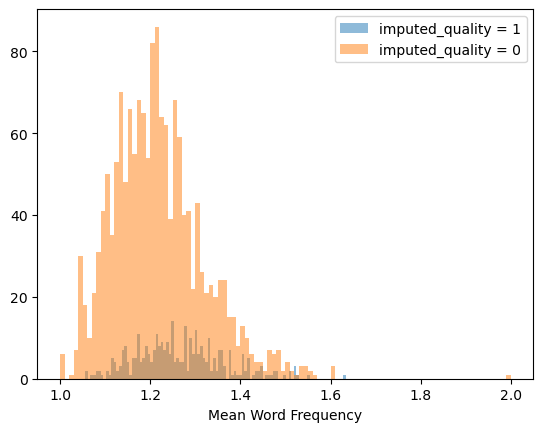

In [8]:
# Create a new column with mean word frequency values
df['mwf'] = df['content'].apply(calculate_mwf)

# Mean Word Frequency by imputed_quality
plt.figure()
plt.hist(df[df['imputed_quality'] == 1]['mwf'], bins=100, alpha=0.5, label='imputed_quality = 1')
plt.hist(df[df['imputed_quality'] == 0]['mwf'], bins=100, alpha=0.5, label='imputed_quality = 0')
plt.legend(loc='upper right')

plt.xlabel('Mean Word Frequency')
plt.show()